# Portfolio Management Home Assignment - Group 18

#### Siddhant Bakshi =  8500094
#### Prajesh Chaudhari = 8474036
#### Jatin Dhurve = 8494940

******************************************

# Part 1: Hedge Funds
## 1)CAPM
### a) Report the CAPM beta, alpha, t-stats, and R-squared of each hedge fund index

In [133]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from tabulate import tabulate
import matplotlib.pyplot as plt

In [134]:
Hedge_Fund_returns = pd.read_excel('./HW_Hedge Fund.xlsx')
df_cleaned = Hedge_Fund_returns.iloc[1:].reset_index(drop=True)
df_cleaned.rename(columns={'Short Name': 'Date'}, inplace=True)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
for col in df_cleaned.columns[1:]:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
Hedge_Fund_data = df_cleaned
Hedge_Fund_data

,Date,Aggregate Index,Long/Short,Market Neutral,Value,Event-Driven,Macro,FI Arbitrage
0,2005-01-01,0.0047,0.0067,0.0124,0.0049,0.0012,-0.0052,0.0032
1,2005-02-01,0.0198,0.0279,0.0106,0.0219,0.0111,0.0199,0.0069
2,2005-03-01,-0.0103,-0.0172,0.0022,-0.0111,0.0002,-0.0102,-0.0034
3,2005-04-01,-0.0124,-0.0165,-0.0014,-0.0137,-0.0105,-0.0124,-0.0066
4,2005-05-01,0.0079,0.0122,0.0058,0.0122,0.0064,0.0067,-0.0020
...,...,...,...,...,...,...,...,...
216,2023-01-01,0.0246,0.0436,0.0096,0.0499,0.0284,0.0022,0.0170
217,2023-02-01,-0.0046,-0.0117,0.0021,-0.0110,0.0019,0.0000,-0.0017
218,2023-03-01,-0.0137,-0.0015,0.0013,-0.0050,-0.0205,-0.0366,-0.0069
219,2023-04-01,0.0021,0.0008,-0.0017,0.0019,0.0022,0.0061,0.0002


In [135]:
df_factors = pd.read_excel('./HW_Factors.xlsx')

In [136]:
# Rename columns for better understanding
df_factors.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert 'Date' to a datetime format
df_factors['Date'] = pd.to_datetime(df_factors['Date'], format='%Y%m')

# Convert the remaining columns to numeric values
for col in df_factors.columns[1:]:
    df_factors[col] = pd.to_numeric(df_factors[col], errors='coerce')

# Display the cleaned dataframe to verify the changes
df_factors.head()

,Date,Mkt-RF,SMB,HML,Mom,RF,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1927-01-01,-0.0006,-0.0037,0.0454,0.0036,0.0025,NaN,NaN,NaN,NaN
1,1927-02-01,0.0418,0.0004,0.0294,-0.0214,0.0026,NaN,NaN,NaN,NaN
2,1927-03-01,0.0013,-0.0165,-0.0261,0.0361,0.0030,NaN,NaN,NaN,NaN
3,1927-04-01,0.0046,0.0030,0.0081,0.0430,0.0025,NaN,NaN,NaN,NaN
4,1927-05-01,0.0544,0.0153,0.0473,0.0300,0.0030,NaN,NaN,NaN,NaN


In [137]:
# Filter the DataFrame to include only data from the year 2005 onwards
df_filtered = df_factors[df_factors['Date'] >= '2005-01-01']

# Drop the old date column and rename the new one
df_filtered = df_filtered.reset_index(drop=True)

# Display the first few rows of the filtered DataFrame
df_factors_from_2005 = df_filtered
df_factors_from_2005

,Date,Mkt-RF,SMB,HML,Mom,RF,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2005-01-01,-0.0276,-0.0172,0.0206,0.0305,0.0016,NaN,NaN,NaN,NaN
1,2005-02-01,0.0189,-0.0057,0.0153,0.0337,0.0016,NaN,NaN,NaN,NaN
2,2005-03-01,-0.0197,-0.0140,0.0204,0.0041,0.0021,NaN,NaN,NaN,NaN
3,2005-04-01,-0.0261,-0.0393,0.0006,-0.0069,0.0021,NaN,NaN,NaN,NaN
4,2005-05-01,0.0365,0.0289,-0.0064,0.0045,0.0024,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
216,2023-01-01,0.0665,0.0502,-0.0405,-0.1598,0.0035,NaN,NaN,NaN,NaN
217,2023-02-01,-0.0258,0.0121,-0.0078,0.0021,0.0034,NaN,NaN,NaN,NaN
218,2023-03-01,0.0251,-0.0559,-0.0901,-0.0250,0.0036,NaN,NaN,NaN,NaN
219,2023-04-01,0.0061,-0.0334,-0.0003,0.0165,0.0035,NaN,NaN,NaN,NaN


In [138]:
#Individual Index returns
Aggregate_Index_returns = Hedge_Fund_data['Aggregate Index']
Long_short_returns = Hedge_Fund_data['Long/Short']
Market_neutral_returns = Hedge_Fund_data['Market Neutral']
Value_returns = Hedge_Fund_data['Value']
Event_Driven_returns = Hedge_Fund_data['Event-Driven']
Macro_returns = Hedge_Fund_data['Macro']
FI_Arbitrage_returns = Hedge_Fund_data['FI Arbitrage']

#Market_return
market_returns_data = df_factors_from_2005['Mkt-RF']

In [139]:
# Create merged DataFrame with hedge fund indices and market return
data = {
    "Aggregate Index": Hedge_Fund_data['Aggregate Index'],
    "Long/Short": Hedge_Fund_data['Long/Short'],
    "Market Neutral": Hedge_Fund_data['Market Neutral'],
    "Value": Hedge_Fund_data['Value'],
    "Event-Driven": Hedge_Fund_data['Event-Driven'],
    "Macro": Hedge_Fund_data['Macro'],
    "FI Arbitrage": Hedge_Fund_data['FI Arbitrage'],
    'Mkt-RF': df_factors_from_2005['Mkt-RF']
}
df_merged = pd.DataFrame(data)

# Function to perform CAPM regression and return metrics
def calculate_capm_metrics(excess_returns, market_excess):
    # Add constant to the market excess returns for the intercept (alpha)
    X = sm.add_constant(market_excess)
    y = excess_returns
    
    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()
    
    # Extract alpha, beta, t-statistics, and R-squared
    alpha = model.params['const']
    beta = model.params['Mkt-RF']
    t_alpha = model.tvalues['const']
    t_beta = model.tvalues['Mkt-RF']
    r_squared = model.rsquared
    
    return alpha, beta, t_alpha, t_beta, r_squared

# Initialize a dictionary to store the results
capm_results = {}

# List of hedge fund indices to perform the CAPM regression on
hedge_fund_indices = ["Aggregate Index", "Long/Short", "Market Neutral", 
                      "Value", "Event-Driven", "Macro", "FI Arbitrage"]

# Perform CAPM regression for each hedge fund index
for index in hedge_fund_indices:
    # Calculate excess returns by subtracting market risk-free rate (if applicable)
    excess_returns = df_merged[index] - df_factors_from_2005['RF']  # Assuming 'RF' is the risk-free rate
    market_excess = df_merged['Mkt-RF']
    
    # Calculate CAPM metrics
    alpha, beta, t_alpha, t_beta, r_squared = calculate_capm_metrics(excess_returns, market_excess)
    
    # Store the results
    capm_results[index] = {
        'Alpha': alpha,
        'Beta': beta,
        't-Statistic (Alpha)': t_alpha,
        't-Statistic (Beta)': t_beta,
        'R-squared': r_squared
    }

In [140]:
df = pd.DataFrame(capm_results).T

markdown_table = tabulate(df, headers='keys', tablefmt='pipe')
print(markdown_table)

|                 |       Alpha |      Beta |   t-Statistic (Alpha) |   t-Statistic (Beta) |   R-squared |
|:----------------|------------:|----------:|----------------------:|---------------------:|------------:|
| Aggregate Index | 0.00159159  | 0.302567  |              2.37053  |             20.5597  |   0.65872   |
| Long/Short      | 0.00110286  | 0.504403  |              1.23948  |             25.8628  |   0.753347  |
| Market Neutral  | 0.00119967  | 0.0889912 |              2.20481  |              7.46167 |   0.202699  |
| Value           | 0.000426736 | 0.559282  |              0.518408 |             30.9972  |   0.81438   |
| Event-Driven    | 0.00127925  | 0.355344  |              1.40475  |             17.8021  |   0.591353  |
| Macro           | 0.00218038  | 0.0554444 |              2.15581  |              2.50101 |   0.0277688 |
| FI Arbitrage    | 0.00217719  | 0.185218  |              3.31224  |             12.8555  |   0.430078  |


### b) Pick two of the hedge fund strategies and describe why they could be an attractive investment.

### 1. Macro Strategy

#### High Alpha: 
The Macro strategy shows the highest alpha value at 0.00218038, indicating it generates the most excess return independent of market movements. This suggests a strong ability to capture opportunities based on macroeconomic events, which can be attractive for investors seeking high returns.

#### Significant t-Statistic (Alpha): 
The t-statistic for alpha is 2.15581, which suggests the alpha is statistically significant. This makes the strategy attractive, as it implies a consistent ability to generate excess returns.

#### Diversification Benefit: 
The low beta (0.0554444) indicates minimal exposure to the market, meaning that returns are less correlated with overall market performance. This could provide excellent diversification benefits for an investor's portfolio.

### 2. Long/Short Strategy

#### High R-Squared Value: 
The R-squared value of 0.753347 suggests that a substantial portion of the variation in the Long/Short strategy’s returns can be explained by market movements. This means that while the strategy is influenced by market conditions, it still provides enough room for active management to outperform.

#### Balanced Risk and Reward: 
With a beta of 0.504403, this strategy offers moderate exposure to market risk, allowing investors to benefit from market upside while managing downside risk. This balance, along with the alpha of 0.00110286, indicates that it has potential for reasonable risk-adjusted returns.

#### Statistical Significance of Beta: 
The t-statistic for beta is quite high at 25.8628, suggesting that market exposure is statistically robust, which might be useful for investors seeking both directional and hedging capabilities.

These two strategies could be attractive investments depending on an investor's risk tolerance and market outlook. The Macro strategy offers the potential for strong alpha with low market correlation, while the Long/Short strategy provides a balanced approach, offering the potential for alpha generation alongside managed exposure to market movements.

*********************************************************************************************************************************

## 2)Four-Factor Model

In [145]:
# Strip any whitespace from the column names
df_factors_from_2005.columns = df_factors_from_2005.columns.str.strip()

# Print the cleaned column names to verify
print(df_factors_from_2005.columns)

Index(['Date', 'Mkt-RF', 'SMB', 'HML', 'Mom', 'RF', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


In [146]:
# Update merged DataFrame with additional factors, including momentum (Mom)
data = {
    "Aggregate Index": Hedge_Fund_data['Aggregate Index'],
    "Long/Short": Hedge_Fund_data['Long/Short'],
    "Market Neutral": Hedge_Fund_data['Market Neutral'],
    "Value": Hedge_Fund_data['Value'],
    "Event-Driven": Hedge_Fund_data['Event-Driven'],
    "Macro": Hedge_Fund_data['Macro'],
    "FI Arbitrage": Hedge_Fund_data['FI Arbitrage'],
    'Mkt-RF': df_factors_from_2005['Mkt-RF'],
    'SMB': df_factors_from_2005['SMB'],  # Small Minus Big
    'HML': df_factors_from_2005['HML'],  # High Minus Low
    'Mom': df_factors_from_2005['Mom'],  # Momentum (after cleaning)
    'RF': df_factors_from_2005['RF']     # Risk-Free Rate
}

df_merged = pd.DataFrame(data)

In [147]:
# Function to perform four-factor regression and return metrics
def calculate_four_factor_metrics(excess_returns, factors):
    # Add constant to the factors for the intercept (alpha)
    X = sm.add_constant(factors)
    y = excess_returns
    
    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()
    
    # Extract alpha, beta, t-statistics, and R-squared
    alpha = model.params['const']
    beta_mkt = model.params['Mkt-RF']
    beta_smb = model.params['SMB']
    beta_hml = model.params['HML']
    beta_mom = model.params['Mom']
    t_alpha = model.tvalues['const']
    t_beta_mkt = model.tvalues['Mkt-RF']
    t_beta_smb = model.tvalues['SMB']
    t_beta_hml = model.tvalues['HML']
    t_beta_mom = model.tvalues['Mom']
    r_squared = model.rsquared
    
    return alpha, beta_mkt, beta_smb, beta_hml, beta_mom, t_alpha, t_beta_mkt, t_beta_smb, t_beta_hml, t_beta_mom, r_squared

# Initialize a dictionary to store the results
four_factor_results = {}

# Perform four-factor regression for each hedge fund index
for index in hedge_fund_indices:
    # Calculate excess returns by subtracting the risk-free rate
    excess_returns = df_merged[index] - df_merged['RF']
    
    # Extract factors: Market excess return, SMB, HML, Mom
    factors = df_merged[['Mkt-RF', 'SMB', 'HML', 'Mom']]
    
    # Calculate four-factor metrics
    alpha, beta_mkt, beta_smb, beta_hml, beta_mom, t_alpha, t_beta_mkt, t_beta_smb, t_beta_hml, t_beta_mom, r_squared = calculate_four_factor_metrics(excess_returns, factors)
    
    # Store the results
    four_factor_results[index] = {
        'Alpha': alpha,
        'Beta (Mkt-RF)': beta_mkt,
        'Beta (SMB)': beta_smb,
        'Beta (HML)': beta_hml,
        'Beta (Mom)': beta_mom,
        't-Statistic (Alpha)': t_alpha,
        't-Statistic (Beta Mkt-RF)': t_beta_mkt,
        't-Statistic (Beta SMB)': t_beta_smb,
        't-Statistic (Beta HML)': t_beta_hml,
        't-Statistic (Beta Mom)': t_beta_mom,
        'R-squared': r_squared
    }


# Optionally, print or analyze the results
for index, metrics in four_factor_results.items():
    print(f"{index} Four-Factor Model Metrics:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Aggregate Index Four-Factor Model Metrics:
  Alpha: 0.0016
  Beta (Mkt-RF): 0.2992
  Beta (SMB): 0.0551
  Beta (HML): -0.0015
  Beta (Mom): 0.0170
  t-Statistic (Alpha): 2.3634
  t-Statistic (Beta Mkt-RF): 18.0192
  t-Statistic (Beta SMB): 1.9120
  t-Statistic (Beta HML): -0.0705
  t-Statistic (Beta Mom): 1.0188
  R-squared: 0.6658

Long/Short Four-Factor Model Metrics:
  Alpha: 0.0011
  Beta (Mkt-RF): 0.4925
  Beta (SMB): 0.1008
  Beta (HML): -0.0454
  Beta (Mom): 0.0042
  t-Statistic (Alpha): 1.2583
  t-Statistic (Beta Mkt-RF): 22.6573
  t-Statistic (Beta SMB): 2.6692
  t-Statistic (Beta HML): -1.6159
  t-Statistic (Beta Mom): 0.1939
  R-squared: 0.7642

Market Neutral Four-Factor Model Metrics:
  Alpha: 0.0011
  Beta (Mkt-RF): 0.1032
  Beta (SMB): 0.0042
  Beta (HML): 0.0274
  Beta (Mom): 0.0470
  t-Statistic (Alpha): 2.0412
  t-Statistic (Beta Mkt-RF): 7.8172
  t-Statistic (Beta SMB): 0.1844
  t-Statistic (Beta HML): 1.6022
  t-Statistic (Beta Mom): 3.5364
  R-squared: 0.2475

Valu

|                    | Alpha  | Beta (Mkt-RF) | Beta (SMB) | Beta (HML) | Beta (Mom) | t-Statistic (Alpha) | t-Statistic (Beta Mkt-RF) | t-Statistic (Beta SMB) | t-Statistic (Beta HML) | t-Statistic (Beta Mom) | R-squared |
|--------------------|--------|---------------|------------|------------|------------|---------------------|--------------------------|------------------------|------------------------|------------------------|-----------|
| Aggregate Index    | 0.0016 | 0.2992        | 0.0551     | -0.0015    | 0.0170     | 2.3634              | 18.0192                  | 1.9120                 | -0.0705                | 1.0188                 | 0.6658    |
| Long/Short         | 0.0011 | 0.4925        | 0.1008     | -0.0454    | 0.0042     | 1.2583              | 22.6573                  | 2.6692                 | -1.6159                | 0.1939                 | 0.7642    |
| Market Neutral     | 0.0011 | 0.1032        | 0.0042     | 0.0274     | 0.0470     | 2.0412              | 7.8172                   | 0.1844                 | 1.6022                 | 3.5364                 | 0.2475    |
| Value              | 0.0007 | 0.5289        | 0.1036     | 0.0254     | -0.0228    | 0.8356              | 26.4649                  | 2.9852                 | 0.9806                 | -1.1329                | 0.8248    |
| Event-Driven       | 0.0016 | 0.3228        | 0.1253     | 0.0765     | -0.0035    | 1.8013              | 14.8277                  | 3.3136                 | 2.7168                 | -0.1582                | 0.6259    |
| Macro              | 0.0019 | 0.0927        | -0.0529    | 0.0374     | 0.0827     | 1.9144              | 3.7817                   | -1.2422                | 1.1781                 | 3.3501                 | 0.0848    |
| FI Arbitrage       | 0.0024 | 0.1613        | 0.0421     | -0.0014    | -0.0429    | 3.6559              | 10.0559                  | 1.5105                 | -0.0672                | -2.6572                | 0.4567    |


## Analysis on Four factor model

### 1. Aggregate Index:
#### Significant Loadings:
The market factor (Beta (Mkt-RF)) has a high loading of 0.2992 with a t-statistic of 18.0192, indicating a strong and significant relationship with market risk.

#### Other Factors:
The SMB and Mom factors show moderate influence, while the HML factor has a very small and negative value, suggesting minimal impact.

#### Most Important Factor: 
The market factor (Beta (Mkt-RF)) is the most important in explaining performance, with a strong coefficient and significant t-statistic.

****************************

### 2. Long/Short:
#### Significant Loadings:
Market Factor (Beta (Mkt-RF)) has a high value of 0.4925 and a t-statistic of 22.6573, indicating strong exposure to market risk.
SMB (Size Premium) also shows significance, with a value of 0.1008 and a t-statistic of 2.6692, suggesting exposure to small-cap stocks.

#### Other Factors:
The HML factor is negative, indicating that the strategy might be more focused on growth rather than value stocks.

#### Most Important Factor: 
The market factor is again the most significant, with SMB also playing a notable role.

****************************

### 3. Market Neutral:
#### Significant Loadings:
The Mom (Momentum) factor shows a positive loading of 0.0470 with a significant t-statistic of 3.5364, indicating that momentum is crucial for this strategy.

#### Other Factors:
The market factor has a smaller loading (0.1032), with lower exposure, and SMB is almost negligible.

#### Most Important Factor: 
The momentum factor seems to be the most critical in explaining the performance of the market neutral strategy, with the highest significant coefficient.

****************************

### 4. Value:
#### Significant Loadings:
Market Factor (Beta (Mkt-RF)) has a loading of 0.5289 with a very significant t-statistic of 26.4649. The SMB factor also has a relatively high and positive loading of 0.1036, with a t-statistic of 2.9852, indicating exposure to small-cap stocks.

#### Other Factors:
The HML factor has a smaller impact but is positive, suggesting a preference towards value stocks.

#### Most Important Factor: 
The market factor is the most significant for the Value index, along with a moderate influence from the SMB factor.

****************************

### 5. Event-Driven:
#### Significant Loadings:
The market factor has a positive loading of 0.3228, with a t-statistic of 14.8277, indicating it plays an important role.
SMB and HML also have positive loadings (0.1253 and 0.0765), both with significant t-statistics (3.3136 and 2.7168).

#### Other Factors:
The momentum factor (Mom) is not significant, as indicated by a very small and negative coefficient with a low t-statistic.

#### Most Important Factor: 
The market factor is the most important, followed by SMB and HML factors, which also show significance.

****************************

### 6. Macro:
#### Significant Loadings:
The momentum factor (Beta (Mom)) has a value of 0.0827 with a t-statistic of 3.3501, indicating a significant role in this strategy.

#### Other Factors:
The market factor shows some impact, with a loading of 0.0927 and a lower t-statistic (3.7817), but it is less significant compared to momentum. SMB is negative, suggesting an exposure against small-cap stocks.

#### Most Important Factor: 
The momentum factor is most significant in explaining the performance of the Macro strategy.

****************************

### 7. FI Arbitrage:
#### Significant Loadings:
The market factor (Beta (Mkt-RF)) has a value of 0.1613 with a significant t-statistic of 10.0559. The momentum factor (Mom) has a negative coefficient (-0.0429) with a significant t-statistic of -2.6572, suggesting a meaningful negative exposure to momentum.

#### Other Factors:
The HML factor has minimal influence, as shown by a low coefficient and t-statistic. Most Important Factor: The market factor is the most significant, but momentum also plays a negative role.

#### Summary:
Market Factor (Mkt-RF) is the most important across most hedge fund indices, especially for Aggregate Index, Long/Short, Value, Event-Driven, and FI Arbitrage strategies. Momentum (Mom) is particularly significant for Market Neutral, Macro, and FI Arbitrage strategies, showing both positive and negative impacts.
SMB (Size Premium) is significant for Long/Short, Value, and Event-Driven, indicating exposure to small-cap stocks.
HML (Value Premium) plays a moderate role for Value and Event-Driven indices.
Overall, the market factor is generally the most important across different strategies, with momentum and size also providing important explanatory power depending on the specific strategy.

## 3) Time-Varying Beta and transfer to additional analysis

In [151]:
# Assuming df_merged contains the full dataset including hedge fund indices, 'Mkt-RF' (market excess return), and 'RF' (risk-free rate)
# Define up and down market periods based on 'Mkt-RF'
df_up = df_merged[df_merged['Mkt-RF'] > 0]
df_down = df_merged[df_merged['Mkt-RF'] < 0]

# Function to calculate CAPM beta using OLS regression
def calculate_capm_beta(df, hedge_fund_index):
    excess_returns = df[hedge_fund_index] - df['RF']
    market_excess = df['Mkt-RF']
    
    # Add constant for alpha calculation
    X = sm.add_constant(market_excess)
    y = excess_returns
    
    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()
    
    # Extract beta and alpha
    alpha = model.params['const']
    beta = model.params['Mkt-RF']
    t_stat_beta = model.tvalues['Mkt-RF']
    r_squared = model.rsquared
    
    return alpha, beta, t_stat_beta, r_squared

# List of hedge fund indices to analyze
hedge_fund_indices = ["Aggregate Index", "Long/Short", "Market Neutral", 
                      "Value", "Event-Driven", "Macro", "FI Arbitrage"]

# Calculate CAPM beta for each hedge fund index in up and down markets
capm_results = {}

for index in hedge_fund_indices:
    # Calculate CAPM metrics for up markets
    alpha_up, beta_up, t_stat_beta_up, r_squared_up = calculate_capm_beta(df_up, index)
    
    # Calculate CAPM metrics for down markets
    alpha_down, beta_down, t_stat_beta_down, r_squared_down = calculate_capm_beta(df_down, index)
    
    # Store the results
    capm_results[index] = {
        'Beta (Up Market)': beta_up,
        't-Statistic (Beta Up)': t_stat_beta_up,
        'R-squared (Up Market)': r_squared_up,
        'Beta (Down Market)': beta_down,
        't-Statistic (Beta Down)': t_stat_beta_down,
        'R-squared (Down Market)': r_squared_down
    }

# Convert the results to a DataFrame for easier analysis
df_capm_results = pd.DataFrame(capm_results).T

# Format numerical values to four decimal places
df_capm_results = df_capm_results.applymap(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)

# Print the results in a readable format
df_capm_results

/var/folders/ky/n1n3tvzn3zb6_44x8nfzwn700000gn/T/ipykernel_12785/2221727115.py:54: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_capm_results = df_capm_results.applymap(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)


,Beta (Up Market),t-Statistic (Beta Up),R-squared (Up Market),Beta (Down Market),t-Statistic (Beta Down),R-squared (Down Market)
Aggregate Index,0.2789,9.6177,0.3978,0.2964,7.9931,0.4535
Long/Short,0.4706,12.3814,0.5227,0.5064,10.1707,0.5733
Market Neutral,0.1155,5.0320,0.1532,0.0726,2.3588,0.0674
Value,0.5522,15.4565,0.6305,0.5512,12.1455,0.6570
Event-Driven,0.3136,8.9635,0.3646,0.4600,8.3989,0.4781
Macro,0.0595,1.2928,0.0118,-0.0724,-1.4611,0.0270
FI Arbitrage,0.1536,6.3725,0.2248,0.2360,5.6920,0.2962


## Analysis of CAPM Beta in Up and Down Markets for Hedge Funds

### Observations and Findings
 
#### Aggregate Index:

##### Beta Analysis: 
The beta is similar in both up (0.2789) and down markets (0.2964), indicating consistent market exposure across market phases.

##### Implication: 
This lack of reduction in beta during down markets suggests that the Aggregate Index does not provide significant downside protection, which is not ideal for investors seeking safety during downturns.

*************************************

#### Long/Short:

##### Beta Analysis: 
The beta is higher in down markets (0.5064) compared to up markets (0.4706). This indicates increased exposure during downturns.

##### Implication: 
The lack of beta reduction in down markets implies that this strategy is more exposed to market declines, which may result in increased losses during such periods. This is undesirable for risk-averse investors.

*************************************

#### Market Neutral:

##### Beta Analysis: 
The beta is lower in down markets (0.0726) compared to up markets (0.1155), showing reduced exposure during downturns.

##### Implication: 
This is a desirable characteristic for investors seeking downside protection. The Market Neutral strategy effectively manages its market exposure, aligning well with its intended objective.

*************************************

#### Value:

##### Beta Analysis: 
The beta is almost identical in both up (0.5522) and down markets (0.5512).

##### Implication: 
This indicates stable market exposure irrespective of market conditions, which may not be suitable for investors who desire reduced risk during downturns.

*************************************

#### Event-Driven:

##### Beta Analysis: 
The beta is higher during down markets (0.4600) compared to up markets (0.3136), indicating greater exposure when the market is declining.

##### Implication: 
The increased beta in down markets suggests that the Event-Driven strategy is more vulnerable to market downturns, which is not favorable for investors seeking downside protection.

*************************************

#### Macro:

##### Beta Analysis: 
The beta is reduced in down markets (-0.0724) compared to up markets (0.0595), and even turns slightly negative.

##### Implication: 
The negative beta during down markets implies some hedging capability, which is beneficial for investors looking to mitigate losses during market declines.

*************************************

#### FI Arbitrage:

##### Beta Analysis: 
The beta increases in down markets (0.2360) compared to up markets (0.1536), showing greater sensitivity to negative market conditions.

##### Implication: 
The higher beta during down markets suggests that FI Arbitrage may face increased losses during downturns, which is not ideal for hedge fund investors looking for stable or reduced exposure during adverse conditions.

*************************************

### Desirable Outcomes for Hedge Fund Investors

#### Lower Beta in Down Markets: 
Investors generally prefer hedge funds that exhibit a lower beta during down markets to mitigate losses when the broader market declines. This behavior was observed in Market Neutral and Macro strategies, which effectively reduced their market 
exposure during downturns.

#### Higher or Moderate Beta in Up Markets: 
To maximize returns during favorable market conditions, a higher beta during up markets is desirable. Strategies like Value and Long/Short exhibited relatively high betas during up markets, which allows for better participation in market gains.

#### Dynamic Risk Management: 
Ideally, hedge funds should demonstrate dynamic beta adjustment, reducing exposure during down markets and increasing exposure during up markets. This indicates effective market timing and risk management, providing both growth potential and downside protection for investors.

##### In summary, hedge funds like Market Neutral and Macro show more desirable characteristics, with lower beta in down markets, indicating effective downside protection. Conversely, strategies like Long/Short and Event-Driven have higher betas in down markets, which suggests increased risk exposure and potentially greater losses during adverse market conditions.

*************************************

# Part 2: International long-term Momentum

In [155]:
# Load the uploaded Excel file to inspect the data
file_path = 'HW_World.xlsx'
xls = pd.ExcelFile(file_path)

# Load the sheet named 'Together' to examine its content
df = pd.read_excel(xls, sheet_name='Together')

# Convert the Date column to datetime format for easier handling
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

# Set the Date as the index
df.set_index('Date', inplace=True)

# Step 1: Calculate cumulative return over the past 36 months for each country
def calculate_cumulative_return(data, months=36):
    return data.rolling(window=months).apply(lambda x: np.prod(1 + x) - 1, raw=True)

# Calculate the 36-month cumulative returns for all countries
cumulative_returns = calculate_cumulative_return(df)

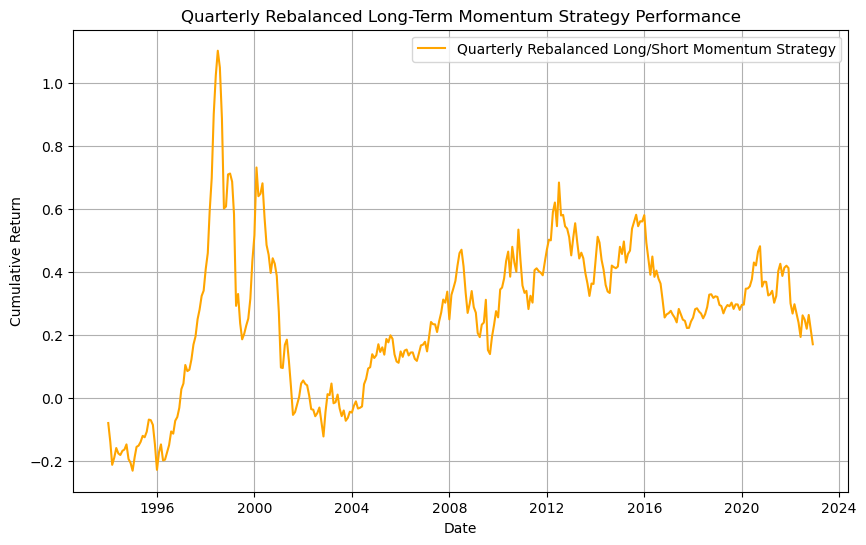

Average Annualized Return: 1.52%
Volatility: 13.79%
Sharpe Ratio: 0.11


In [156]:
# Initialize variables to track the performance metrics
long_short_returns_quarterly = []

# Loop over each quarter starting from the 36th month to form the long/short portfolios
for i in range(36, len(df), 3):
    # Sort the countries based on cumulative returns in month t
    sorted_indices = cumulative_returns.iloc[i - 1].sort_values(ascending=False)
    
    # Pick the top 4 and bottom 4 countries
    top_4 = sorted_indices.index[:4]
    bottom_4 = sorted_indices.index[-4:]
    
    # Form the long/short portfolio and calculate the equal-weighted returns for the next 3 months
    next_returns = df.iloc[i:i+3]
    # The portfolio weights are fixed at 25% each for the longs and shorts
    long_returns = next_returns[top_4].mean(axis=1) * 0.25 * len(top_4)
    short_returns = next_returns[bottom_4].mean(axis=1) * 0.25 * len(bottom_4)
    
    # Calculate the long/short portfolio returns
    long_short_return = long_returns - short_returns
    long_short_returns_quarterly.extend(long_short_return)

# Convert the long/short returns list to a pandas Series
long_short_returns_quarterly = pd.Series(long_short_returns_quarterly, index=df.index[36:36+len(long_short_returns_quarterly)])

# Calculate average annualized return, volatility, and Sharpe ratio for the quarterly rebalanced strategy
average_annualized_return_quarterly = (1 + long_short_returns_quarterly.mean()) ** 12 - 1
volatility_quarterly = long_short_returns_quarterly.std() * np.sqrt(12)
sharpe_ratio_quarterly = average_annualized_return_quarterly / volatility_quarterly

# Plot the cumulative returns of the quarterly rebalanced strategy
cumulative_strategy_returns_quarterly = (1 + long_short_returns_quarterly).cumprod() - 1

plt.figure(figsize=(10, 6))
plt.plot(cumulative_strategy_returns_quarterly.index, cumulative_strategy_returns_quarterly, color='orange', label='Quarterly Rebalanced Long/Short Momentum Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Quarterly Rebalanced Long-Term Momentum Strategy Performance')
plt.legend()
plt.grid(True)
plt.show()

# Printing the metrics in the desired format
print(f"Average Annualized Return: {average_annualized_return_quarterly:.2%}")
print(f"Volatility: {volatility_quarterly:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_quarterly:.2f}")

### Performance Summary:

- **Average Annualized Return**: **1.52%** — The returns are modest, meaning the strategy didn't make a lot of profit overall. It managed to stay positive but wasn't very impressive compared to other possible investments.
- **Volatility**: **13.79%** — This indicates that the returns fluctuated a lot over time. High volatility means there were big swings in performance, which makes this strategy quite risky. It could lead to good gains, but also significant losses.
- **Sharpe Ratio**: **0.11** — The Sharpe Ratio is used to measure how much return is earned compared to the risk taken. A ratio of 0.11 is very low, suggesting that the return earned is not enough to justify the amount of risk. Ideally, we want a Sharpe Ratio above 1, which would mean better risk-adjusted returns.

### Comments:

Overall, the strategy’s performance is not very encouraging. It did manage to produce some gains, but these gains came with a lot of unpredictability, as reflected in the high volatility. The low Sharpe Ratio tells us that the returns weren't worth the risks taken, making it a less attractive option for investors.

To improve the strategy, it could help to diversify more. This means including a wider range of assets or countries to reduce risk. Additionally, tweaking the timing of trades could be beneficial—perhaps by holding positions for a shorter or longer period depending on market conditions. Finally, adding more criteria when selecting which assets to include (such as considering valuation or other indicators) could improve the decision-making process and lead to better overall performance.


# Part 3: Portfolio Construction

In [159]:
# Load both sheets to examine their content
djia_data = pd.read_excel('HW_DJIA Prices.xlsx', sheet_name='DJIA')
shares_data = pd.read_excel('HW_DJIA Prices.xlsx', sheet_name='Shares')

In [160]:
# Creating a dictionary for mapping stock symbols to full company names
ticker_to_company = {
    'MMM': '3M CO',
    'AXP': 'AMERICAN EXPRESS CO',
    'AMGN': 'AMGEN INC',
    'AAPL': 'APPLE COMPUTER INC',
    'BA': 'BOEING CO',
    'CAT': 'CATERPILLAR INC',
    'CVX': 'CHEVRON CORP NEW',
    'CSCO': 'CISCO SYSTEMS INC',
    'KO': 'COCA COLA CO',
    'DIS': 'DISNEY WALT CO',
    'DD': 'DU PONT E I DE NEMOURS & CO',
    'GS': 'GOLDMAN SACHS GROUP INC',
    'HON': 'HONEYWELL INTERNATIONAL INC',
    'HD': 'HOME DEPOT INC',
    'IBM': 'INTERNATIONAL BUSINESS MACHS COR',
    'INTC': 'INTEL CORP',
    'JNJ': 'JOHNSON & JOHNSON',
    'JPM': 'J P MORGAN CHASE & CO',
    'MCD': 'MCDONALDS CORP',
    'MRK': 'MERCK & CO INC',
    'MSFT': 'MICROSOFT CORP',
    'NKE': 'NIKE INC',
    'PG': 'PROCTER & GAMBLE CO',
    'CRM': 'SALESFORCE COM INC',
    'BAC': 'BANK OF AMERICA CORP',
    'UNH': 'UNITED HEALTHCARE CORP',
    'VZ': 'VERIZON COMMUNICATIONS INC',
    'HWP': 'HEWLETT PACKARD CO',
    'PFE': 'PFIZER INC',
    'WMT': 'WAL MART STORES INC'
}

# Retry adding tickers to shares_data and filter relevant columns
shares_data['Ticker'] = shares_data['Name'].map({v: k for k, v in ticker_to_company.items()})
shares_data_2004 = shares_data[['Ticker', 'Shares Jun 2004']].dropna()

# Transform DJIA data from wide to long format and merge to calculate market cap
djia_prices = djia_data.melt(id_vars=['Date'], var_name='Ticker', value_name='Price')
djia_prices = djia_prices.merge(shares_data_2004, on='Ticker')

# Calculate market capitalization for June 2004
market_cap_2004 = djia_prices[djia_prices['Date'] == '2004-06-30']
market_cap_2004['Market_Cap'] = market_cap_2004['Price'] * market_cap_2004['Shares Jun 2004']
market_cap_2004 = market_cap_2004[['Ticker', 'Market_Cap']].set_index('Ticker')

# Convert market capitalization values from scientific notation to standard number format
market_cap_2004['Market_Cap'] = market_cap_2004['Market_Cap'].apply(lambda x: '{:,.2f}'.format(x))

# Display the updated market_cap_2004 with numbers in standard format
market_cap_2004

/var/folders/ky/n1n3tvzn3zb6_44x8nfzwn700000gn/T/ipykernel_12785/3621970358.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_cap_2004['Market_Cap'] = market_cap_2004['Price'] * market_cap_2004['Shares Jun 2004']


,Market_Cap
Ticker,
MMM,"70,398,081.14"
AXP,"65,657,011.98"
AMGN,"69,052,878.00"
AAPL,"189,068,411.66"
BA,"43,075,562.79"
CAT,"27,160,694.88"
CVX,"100,702,687.83"
CSCO,"160,247,289.30"
KO,"122,953,075.92"


In [161]:
# Convert market capitalization values to numeric format (removing any commas and converting to float)
market_cap_2004['Market_Cap'] = market_cap_2004['Market_Cap'].replace(',', '', regex=True).astype(float)

# 1. Value Portfolio (Market Capitalization Weighted)
# Calculate weights based on market capitalization in June 2004
value_portfolio_weights = market_cap_2004['Market_Cap'] / market_cap_2004['Market_Cap'].sum()

# 2. Equal-Weighted Portfolio
# Assign equal weights to each stock
equal_weighted_weights = pd.Series(1 / len(market_cap_2004), index=market_cap_2004.index)

# 3. Minimum Variance Portfolio
# Calculate monthly returns for each stock
djia_pivot = djia_data.set_index('Date').drop(columns=['DJIA'])
monthly_returns = djia_pivot.pct_change().dropna()

# Estimate the variance-covariance matrix for the entire sample period
cov_matrix = monthly_returns.cov()

# Define function to calculate minimum variance portfolio weights
def minimum_variance_weights(cov_matrix):
    n = len(cov_matrix)
    ones = np.ones(n)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    w_mvp = inv_cov_matrix.dot(ones) / ones.dot(inv_cov_matrix).dot(ones)
    return pd.Series(w_mvp, index=cov_matrix.columns)

# Calculate minimum variance portfolio weights
min_variance_weights = minimum_variance_weights(cov_matrix)

# 4. Naive Risk Parity Portfolio
# Inverse volatility approach to assign weights
volatility = monthly_returns.std()
inv_volatility_weights = 1 / volatility
risk_parity_weights = inv_volatility_weights / inv_volatility_weights.sum()

# Define risk-free rate 
risk_free_rate = 0.097534/100 #to the average from HW_Factors data

# Calculate the excess returns for each stock over the risk-free rate (element-wise subtraction)
excess_returns_aligned = monthly_returns.subtract(risk_free_rate, axis=0)

# Calculate the mean returns for each stock over the sample period
mean_returns = monthly_returns.mean()

# Excess returns over the risk-free rate
excess_returns = mean_returns - risk_free_rate

# Ensure excess returns are properly aligned to the covariance matrix for calculations
excess_returns_aligned = excess_returns.reindex(cov_matrix.columns)

# Define function to calculate tangent portfolio weights using the exact formulas
# w = (1 / theta) * inv(Sigma) * R
# w_Tangent = w / (1' * w)
def tangent_portfolio_weights(cov_matrix, excess_returns):
    # Calculate the inverse of the covariance matrix
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    # Calculate unnormalized weights: w = (1 / theta) * inv(Sigma) * R
    w = inv_cov_matrix.dot(excess_returns)
    
    # Normalize the weights so that they sum to 1: w_Tangent = w / (1' * w)
    w_tangent = w / w.sum()
    
    return pd.Series(w_tangent, index=cov_matrix.columns)

# Calculate tangent portfolio weights
tangent_portfolio_weights = tangent_portfolio_weights(cov_matrix, excess_returns_aligned)

# Extract industry group information from shares_data
shares_data_groups = shares_data[['Ticker', 'Major Group']].dropna()

# Merge market cap data with the industry group information
market_cap_with_groups = market_cap_2004.merge(shares_data_groups, left_index=True, right_on='Ticker')

# 6. Portfolio that buys the largest stock from each industry group and equally weights the five stocks
# Find the largest stock by market capitalization for each group
largest_stock_per_group = market_cap_with_groups.loc[market_cap_with_groups.groupby('Major Group')['Market_Cap'].idxmax()]

# Assign equal weight (20%) to each of the largest stocks from the five industry groups
largest_stock_weights = pd.Series(0, index=market_cap_2004.index)
for ticker in largest_stock_per_group['Ticker']:
    largest_stock_weights[ticker] = 1 / len(largest_stock_per_group)

# 7. Portfolio where each industry group has the same weight (20%)
# Assign equal weight to each group and equally distribute within each group
industry_groups = market_cap_with_groups.groupby('Major Group')
equal_group_weights = pd.Series(0, index=market_cap_2004.index)
for group_name, group_data in industry_groups:
    weight_per_stock = 0.2 / len(group_data)  # 20% per group divided by number of stocks in the group
    for ticker in group_data['Ticker']:
        equal_group_weights[ticker] = weight_per_stock


# Display all calculated portfolio weights
portfolio_weights = pd.DataFrame({
    'Value Portfolio': value_portfolio_weights,
    'Equal-Weighted Portfolio': equal_weighted_weights,
    'Minimum Variance Portfolio': min_variance_weights,
    'Risk Parity Portfolio': risk_parity_weights,
    'Tangent Portfolio': tangent_portfolio_weights,
    'Largest Stock Portfolio': largest_stock_weights,
    'Equal Industry Group Portfolio': equal_group_weights
})
 
portfolio_weights

/var/folders/ky/n1n3tvzn3zb6_44x8nfzwn700000gn/T/ipykernel_12785/1478395220.py:83: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  largest_stock_weights[ticker] = 1 / len(largest_stock_per_group)
/var/folders/ky/n1n3tvzn3zb6_44x8nfzwn700000gn/T/ipykernel_12785/1478395220.py:92: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  equal_group_weights[ticker] = weight_per_stock


,Value Portfolio,Equal-Weighted Portfolio,Minimum Variance Portfolio,Risk Parity Portfolio,Tangent Portfolio,Largest Stock Portfolio,Equal Industry Group Portfolio
MMM,0.022431,0.033333,0.082040,0.039922,-0.276115,0.0,0.020000
AXP,0.020921,0.033333,-0.012234,0.024584,-0.038539,0.0,0.050000
AMGN,0.022003,0.033333,-0.009578,0.032634,0.101053,0.0,0.020000
AAPL,0.060244,0.033333,0.087575,0.024223,0.384738,0.0,0.028571
BA,0.013725,0.033333,0.020401,0.024914,0.073527,0.0,0.050000
CAT,0.008654,0.033333,0.006949,0.024308,0.135929,0.0,0.020000
CVX,0.032087,0.033333,0.034633,0.030633,0.125185,0.2,0.050000
CSCO,0.051060,0.033333,-0.039859,0.030877,0.003905,0.0,0.028571
KO,0.039177,0.033333,0.001229,0.039531,-0.097928,0.0,0.020000
DIS,0.016668,0.033333,0.031916,0.032606,0.018817,0.0,0.040000


## The portfolios vary significantly in their approaches, influencing asset allocation and potential performance.

### 1. Similarities:
#####    - All portfolios use the same set of prominent U.S. companies, ensuring consistency in the assets selected.
#####    - The Equal-Weighted (3.33% per stock) and Equal Industry Group Portfolios emphasize uniform weight distribution, 
#####      promoting diversification without considering volatility or returns.

### 2. Differences:
#####    - **Value Portfolio**: Prioritizes undervalued stocks (e.g., AAPL at 6.02%), using valuation metrics.
#####    - **Equal-Weighted Portfolio**: Assigns identical 3.33% weights across stocks, disregarding differences in market data.
#####    - **Minimum Variance Portfolio**: Reduces volatility (e.g., MMM at 8.2%), relying on historical data to minimize risk.
#####    - **Risk Parity Portfolio**: Balances risk equally (e.g., MSFT at 3.54%), using volatility for stability.
#####    - **Tangent Portfolio**: Maximizes return per risk unit (e.g., MCD at 55.68%), using return and risk data.
#####    - **Largest Stock Portfolio**: Selects large-cap stocks only, focusing on firms like CVX, BAC, and PFE at 20%.
#####    - **Equal Industry Group Portfolio**: Balances sector exposure, emphasizing diversification across industries.

### 3. Preferred Index Scheme:
#####    - A **Dynamic Risk-Adjusted Weighting** approach, blending Minimum Variance and Risk Parity, could be used. 
#####      It would adapt weights based on market conditions, promoting balanced risk and stable returns.


*************

In [164]:
# Calculate annualized return, volatility, skewness, maximum drawdown, and Sharpe ratio for each portfolio

# Function to calculate portfolio returns based on weights and monthly returns
def calculate_portfolio_returns(weights, returns):
    return returns.dot(weights)

# Calculate monthly returns for each portfolio
portfolio_returns = pd.DataFrame(index=monthly_returns.index)

for portfolio in portfolio_weights.columns:
    portfolio_returns[portfolio] = calculate_portfolio_returns(portfolio_weights[portfolio], monthly_returns)

# Calculate annualized return, volatility, skewness, maximum drawdown, and Sharpe ratio
performance_measures = pd.DataFrame(index=portfolio_weights.columns)

# Annualized return
performance_measures['Annualized Return'] = portfolio_returns.mean() * 12

# Annualized volatility
performance_measures['Volatility'] = portfolio_returns.std() * np.sqrt(12)

# Skewness
performance_measures['Skewness'] = portfolio_returns.skew()

# Maximum drawdown
def calculate_max_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

performance_measures['Max Drawdown'] = portfolio_returns.apply(calculate_max_drawdown)

# Sharpe ratio (assuming risk-free rate of 2% per annum)
annual_risk_free_rate = 0.02
excess_returns = portfolio_returns - (annual_risk_free_rate / 12)
performance_measures['Sharpe Ratio'] = (portfolio_returns.mean() * 12) / (portfolio_returns.std() * np.sqrt(12))

# Display the performance measures for each portfolio
performance_measures

,Annualized Return,Volatility,Skewness,Max Drawdown,Sharpe Ratio
Value Portfolio,0.094066,0.138417,-0.198594,-0.457348,0.679582
Equal-Weighted Portfolio,0.100244,0.150954,-0.164600,-0.470567,0.664068
Minimum Variance Portfolio,0.097690,0.099462,-0.335622,-0.159168,0.982183
Risk Parity Portfolio,0.093461,0.138449,-0.217890,-0.429426,0.675059
Tangent Portfolio,0.353236,0.198226,0.281780,-0.210024,1.781990
Largest Stock Portfolio,0.074117,0.175158,-0.143611,-0.564172,0.423142
Equal Industry Group Portfolio,0.101655,0.158336,-0.175617,-0.496025,0.642017


### Reasons for Differences

**Tangent Portfolio**: This portfolio is optimized for the highest possible return per unit of risk, which explains both its high annualized return and volatility.

**Equal-Weighted and Equal Industry Group Portfolios**: These portfolios diversify risk by equally spreading weights, which limits exposure to individual stock risk but still maintains market-level volatility.

**Minimum Variance Portfolio**: Designed to minimize risk, its low volatility and moderate Sharpe ratio are consistent with this goal.

**Risk Parity Portfolio**: Balancing risk contributions across stocks results in moderate returns and controlled volatility, reflected in its Sharpe ratio.

**Largest Stock Portfolio**: Concentration in large-cap stocks limits upside potential, explaining its lower return and Sharpe ratio.

### Investment Recommendation

Based on these metrics, the **Tangent Portfolio** offers the most attractive balance of return and risk, with a high annualized return (35.32%) and the best Sharpe ratio (1.78). While it has higher volatility, its positive skewness and superior risk-adjusted returns make it an ideal choice for long-term growth.

On **January 1st, 2019**, I would invest in the **Tangent Portfolio**, given its ability to maximize returns with a reasonable trade-off in risk.



**************

# Part 4: Chat GPT

## Let's create an international value portfolio by following your outlined steps and provide a numerical example to illustrate the process.

---

### **Steps to Create an International Value Portfolio**

1. **Data Collection**
2. **Calculate Valuation Metrics**
3. **Rank the Assets**
4. **Select Value Stocks**
5. **Form the Portfolio**

---

### **Numerical Example**

Assume we have collected data for **10 international stocks** from various countries. We'll use hypothetical data for simplicity.

#### **1. Data Collection**

We gather the following data for each stock:

- **Company Name**
- **Country**
- **Market Price per Share**
- **Earnings per Share (EPS)**
- **Book Value per Share**

Here is the collected data:

| Company      | Country    | Price per Share | EPS    | Book Value per Share |
|--------------|------------|-----------------|--------|----------------------|
| **Alpha Co** | Germany    | €50             | €5.00  | €60                  |
| **Beta Inc** | Japan      | ¥2,000          | ¥250   | ¥2,500               |
| **Gamma Ltd**| UK         | £30             | £4.00  | £35                  |
| **Delta SA** | France     | €40             | €3.00  | €50                  |
| **Epsilon AB**| Sweden    | SEK300          | SEK25  | SEK350               |
| **Zeta Corp**| Canada     | C$20            | C$1.80 | C$22                 |
| **Eta Pty**  | Australia  | A$25            | A$2.50 | A$30                 |
| **Theta AG** | Switzerland| CHF70           | CHF6.00| CHF75                |
| **Iota BV**  | Netherlands| €35             | €3.50  | €40                  |
| **Kappa Oy** | Finland    | €28             | €2.80  | €32                  |

#### **2. Calculate Valuation Metrics**

Compute the **Price-to-Earnings (P/E)** and **Price-to-Book (P/B)** ratios for each stock.

- **P/E Ratio = Price per Share ÷ EPS**
- **P/B Ratio = Price per Share ÷ Book Value per Share**

Calculations:

| Company    | P/E Ratio | P/B Ratio |
|------------|-----------|-----------|
| Alpha Co   | 10.0      | 0.83      |
| Beta Inc   | 8.0       | 0.80      |
| Gamma Ltd  | 7.5       | 0.86      |
| Delta SA   | 13.3      | 0.80      |
| Epsilon AB | 12.0      | 0.86      |
| Zeta Corp  | 11.1      | 0.91      |
| Eta Pty    | 10.0      | 0.83      |
| Theta AG   | 11.7      | 0.93      |
| Iota BV    | 10.0      | 0.88      |
| Kappa Oy   | 10.0      | 0.88      |

#### **3. Rank the Assets**

Rank the stocks based on their valuation metrics.

**Ranking by P/E Ratio (Lowest to Highest):**

1. **Gamma Ltd** (7.5)
2. **Beta Inc** (8.0)
3. **Alpha Co**, **Eta Pty**, **Iota BV**, **Kappa Oy** (10.0)
4. **Zeta Corp** (11.1)
5. **Theta AG** (11.7)
6. **Epsilon AB** (12.0)
7. **Delta SA** (13.3)

**Ranking by P/B Ratio (Lowest to Highest):**

1. **Beta Inc**, **Delta SA** (0.80)
2. **Alpha Co**, **Eta Pty** (0.83)
3. **Gamma Ltd**, **Epsilon AB** (0.86)
4. **Iota BV**, **Kappa Oy** (0.88)
5. **Zeta Corp** (0.91)
6. **Theta AG** (0.93)

#### **4. Select Value Stocks**

Select the top-ranked stocks based on both P/E and P/B ratios.

**Top Picks:**

- **Gamma Ltd**: Lowest P/E ratio (7.5) and low P/B ratio (0.86).
- **Beta Inc**: Low P/E ratio (8.0) and lowest P/B ratio (0.80).
- **Alpha Co**: Moderate P/E ratio (10.0) and low P/B ratio (0.83).

#### **5. Form the Portfolio**

Assume an initial investment of **$30,000**, allocating **$10,000** to each selected stock.

**Exchange Rates (Hypothetical):**

- **EUR/USD**: 1 EUR = 1.10 USD
- **JPY/USD**: 1 USD = 110 JPY
- **GBP/USD**: 1 GBP = 1.30 USD

##### **Investment Calculations:**

**A. Gamma Ltd (UK)**

- **Investment in GBP**: $10,000 ÷ 1.30 = **£7,692.31**
- **Shares Purchased**: £7,692.31 ÷ £30 ≈ **256 shares**
- **Actual Investment**: 256 shares × £30 = £7,680
- **Remaining Cash**: £7,692.31 - £7,680 = **£12.31** ($16)

**B. Beta Inc (Japan)**

- **Investment in JPY**: $10,000 × 110 = **¥1,100,000**
- **Shares Purchased**: ¥1,100,000 ÷ ¥2,000 = **550 shares**
- **Actual Investment**: 550 shares × ¥2,000 = ¥1,100,000
- **Remaining Cash**: ¥0 ($0)

**C. Alpha Co (Germany)**

- **Investment in EUR**: $10,000 ÷ 1.10 = **€9,090.91**
- **Shares Purchased**: €9,090.91 ÷ €50 ≈ **181 shares**
- **Actual Investment**: 181 shares × €50 = €9,050
- **Remaining Cash**: €9,090.91 - €9,050 = **€40.91** ($45)

---

# Portfolio Summary

| Company    | Shares Purchased | Investment (Local Currency) | Investment (USD) | Remaining Cash (USD) |
|------------|------------------|----------------------------|------------------|----------------------|
| Gamma Ltd  | 256 shares       | £7,680                     | $9,984           | $16                  |
| Beta Inc   | 550 shares       | ¥1,100,000                 | $10,000          | $0                   |
| Alpha Co   | 181 shares       | €9,050                     | $9,955           | $45                  |
| **Total**  |                  |                            | **$29,939**      | **$61**              |

---

### **Considerations**

- **Diversification**: The portfolio includes stocks from Europe and Asia, spreading risk across different markets.
- **Valuation Metrics**: Selected stocks have the lowest P/E and P/B ratios, indicating potential undervaluation.
- **Currency Risk**: Be aware of exchange rate fluctuations affecting investment value.

---

### **Conclusion**

By following the outlined steps, we've created an international value portfolio that focuses on undervalued stocks based on key financial ratios. This systematic approach helps identify potential investment opportunities across global markets.

---

**Note**: The data and companies used are hypothetical and for illustrative purposes only. Always conduct thorough research or consult a financial advisor before making investment decisions.

---

Is there anything else I can assist you with?


### Here are five potential improvements, made concise and with numerics where possible:

1. **Incorporate More Valuation Metrics:**

   - **Improvement:** Use additional ratios like **Dividend Yield** (e.g., aiming for stocks with yields above **3%**) and **Price-to-Sales (P/S) Ratio** (e.g., targeting P/S below **1.0**).

2. **Enhance Diversification:**

   - **Improvement:** Increase the number of stocks from **3 to 10**, spanning more countries and industries to reduce risk.

3. **Account for Transaction Costs and Taxes:**

   - **Improvement:** Include **brokerage fees** (e.g., $15 per trade) and estimate **tax liabilities** (e.g., **20%** capital gains tax) in investment calculations.

4. **Implement Currency Hedging:**

   - **Improvement:** Use hedging instruments to mitigate currency risk, such as purchasing currency futures covering **$10,000** worth of foreign currency exposure.

5. **Add Qualitative Analysis:**

   - **Improvement:** Assign scores to companies based on management quality and industry position (e.g., rate each on a scale of **1 to 5**) to complement quantitative metrics.